# **Logistic Regression**

In this example, you will learn Logistic Regression to build a 3-class classifier that classifies decision boundaries based on 2 dimensions, namely, sepal length and width of the famous iris dataset. The datapoints are coloured according to labels.

References:
1. IBM Cousera Machine Learning Course
2. Scikit-learn documentation: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
3. Data School: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
4. Scipy: https://www.scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_scatter.html

<a id="ref1"></a>
## What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is the most useful in predicting classes of a data point, such as for example, differentiating the different kinds of flowers. This is because it does not give the most probable class for that data point. Hence, we will need logistic regression.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some features (independent variables $x_1$, $x_2$, etc.). It assumes a function of this form: 
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
We will then find the values of parameters $\theta_0, \theta_1, \theta_2$, etc via gradient descent, where the term $\theta_0$ is the "intercept". It can also be shown us:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special sigmodial curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎. This allows us to obtain the probability of a class. 

$$
Probability Of a Class_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{1}{1+e^{-\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability.

We will then find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$ via gradient descent.

## **Classifying Iris Datasets with Logistic Regression**

Imagine that you are doing some research on different iris types. Instead of studying the iris data one by one and then sorting manually, you want to build an automatic sorter which sorts the iris to its most probable class based on certain distinguising features. 

First, we will import some required libraries.

In [0]:
import numpy as np
import scipy.optimize as opt
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import datasets


Next, we will import some data. The iris dataset consists of 3 different kinds of iris, namely, Setosa, Versicolour and Virginica. There are four different kinds of features: Sepal Length, Sepal Width, Petal Length and Petal Width. We will then visualise the dataset.  

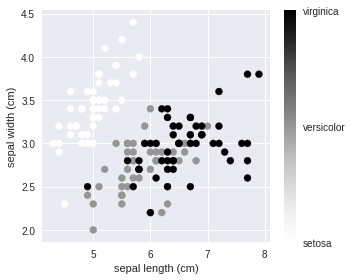

In [0]:
iris=datasets.load_iris()
X = iris.data [:,:2] #we will take the first two features
Y=iris.target #this are the target labels which will be used for the training set and to compute the error of the test set

# visualising the data 

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

We will then split our dataset into training and test set and then normalise our training dataset.Testing points in particular represent real-world data. We should carry out feature normalisation on the training data and use the mean and variance of the training set to normalise the test set, as we are not aware of the mean and variance of our test set (i.e. we treat them as unknown points.) We will split the data into 70% training set and 30% test set.

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
scaler=preprocessing.StandardScaler()
X_train_= scaler.fit_transform(X_train)
X_test_=scaler.transform(X_test)

Train set: (105, 2) (105,)
Test set: (45, 2) (45,)


## **Modelling (Logistic Regression with Scikit Learn)**

We will introduce regularisation to reduce overfitting this time. Regularisation forces the parameters to remain small, preventing overfitting. In this practice, we will also need to use evaluation methods like log loss and jaccard index to determine accuracy of classification.

<img src="https://www.dataschool.io/content/images/2015/01/confusion_matrix2.png">

In [0]:
from sklearn.linear_model import LogisticRegression
# C is the inverse of the regularisation strength
# solver used "lbfgs" for multinomial loss for multiclass problems
# For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary.
LR = LogisticRegression(C=1e5, solver='lbfgs', multi_class="multinomial").fit(X_train_,y_train)
LR

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

Now, we can predict with the test set. 

In [0]:
yhat = LR.predict(X_test_)
print(yhat)

[2 0 2 2 2 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 2 1 0 0 0 1 0 0 1 1 0 2 0 1 2 2
 1 2 0 2 0 2 0 2]


<b> predict_proba </b> returns estimates for all classes, ordered by label of classes. So first column is probability of class 1, P(Y=1 | X) and second column is probability of class 2, P(Y=2 | X) 

In [0]:
yhat_prob = LR.predict_proba(X_test_)
yhat_prob

array([[7.57170583e-19, 4.75002283e-01, 5.24997717e-01],
       [9.99999674e-01, 1.80214517e-07, 1.45862363e-07],
       [1.58552867e-31, 1.47289090e-01, 8.52710910e-01],
       [6.01242160e-31, 9.47701634e-02, 9.05229837e-01],
       [1.11998890e-28, 1.57733578e-01, 8.42266422e-01],
       [2.90626884e-12, 6.17167936e-01, 3.82832064e-01],
       [1.93016329e-15, 6.56348957e-01, 3.43651043e-01],
       [9.99999996e-01, 1.85509513e-09, 2.09922357e-09],
       [1.00000000e+00, 1.00555301e-12, 5.39037063e-13],
       [1.35678833e-17, 5.16374292e-01, 4.83625708e-01],
       [9.95970625e-01, 3.56929953e-03, 4.60075878e-04],
       [1.00000000e+00, 5.14388448e-12, 6.68263805e-13],
       [9.99985590e-01, 1.31895903e-05, 1.22079817e-06],
       [1.64941720e-13, 5.77361125e-01, 4.22638875e-01],
       [6.48190974e-15, 7.88076814e-01, 2.11923186e-01],
       [9.99993921e-01, 5.43310108e-06, 6.45934295e-07],
       [2.51161204e-14, 9.47665153e-01, 5.23348471e-02],
       [9.99999999e-01, 4.99706

## **Evaluation**

### **jaccard index**

For accuracy evaluation, let's use the jaccard index. This is the size of the intersection divided by the size of the union of 2 label sets. For example, A is the predicted labels and B is the true set of labels. If the predicted labels strictly match the true set of labels, then the subset accuracy is 1.0.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1f/Intersection_of_sets_A_and_B.svg">

In [0]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.8444444444444444

### **Log Loss**

In logistic regression, the output is the probability of a certain class. Log loss measures the performance of the classifier when predicted output is between 0 and 1. The higher the log loss, the higher the divergence of the classifier from the actual predicted input.

In [0]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

17.936717833471498